In [ ]:
MODEL : Student Performance Prediction
AUTHOR : SANSKRUTI HADKE
DESCRIPTION : Predicting Student final scores using Linear Regression

In [ ]:
STEPS FOR LINEAR REGRESSION :

1] Collect the Data

2] Define the Problem
Identify the dependent variable [target] (Y) — the value you want, to Visualize the Data
Identify the independent variables [predictors] (X) — the input(s) used to make the prediction.

3] Data cleaning and Preprocessing : 
Handle missing values, outliers, and duplicates.
Convert categorical variables (if any) into numeric using encoding.

4] Visualize the Data
Use a scatter plot to check the relationship between X and Y.
If the points roughly form a straight line → linear regression is appropriate.

5] Split the Data
Training set (80%) → for building the model.
Testing set (20%) → for evaluating the model.

6] Train the Model

7] Make Predictions
Use the trained model to predict Y for new X values.

8] Evaluate the Model
Use metrics to check how well your model performs:
R² Score → measures how well data fits the model. (gives the accuracy of the model)
Mean Absolute Error (MAE)
Mean Squared Error (MSE)
Root Mean Squared Error (RMSE)                                  

In [104]:
# importing libraries
import pandas as pd
import numpy as np
import math
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [105]:
# import algorithm and data split features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [106]:
# importing evaluation metrics for the model
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [107]:
# Data Gathering
df = pd.read_csv('student_performance_dataset.csv')
df

,Student_ID,Gender,Age,Study_Hours,Attendance_%,Previous_Score,Parental_Education,Internet_Access,Sleep_Hours,Extra_Activities,Final_Score
0,S1000,Male,19.0,3.3,82.0,75.0,Diploma,Yes,5.4,Yes,161.838052
1,S1001,Female,19.0,4.2,76.0,65.0,PhD,NaN,8.6,Yes,188.937982
2,S1002,Male,NaN,5.0,85.0,NaN,Diploma,Yes,7.3,No,179.491567
3,S1003,Male,19.0,3.6,67.0,89.0,PhD,Yes,8.3,Yes,151.768598
4,S1004,Male,21.0,4.9,88.0,67.0,Bachelor,Yes,8.1,NaN,236.008039
...,...,...,...,...,...,...,...,...,...,...,...
145,S1145,Male,18.0,2.5,71.0,49.0,Diploma,Yes,4.8,NaN,98.927669
146,S1146,Male,NaN,2.8,83.0,56.0,Diploma,Yes,8.1,No,110.920993
147,S1147,Male,19.0,2.0,NaN,59.0,PhD,Yes,6.9,No,74.075646
148,S1148,Male,20.0,3.6,67.0,63.0,Diploma,Yes,4.2,Yes,181.735310


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Student_ID          150 non-null    object 
 1   Gender              150 non-null    object 
 2   Age                 135 non-null    float64
 3   Study_Hours         135 non-null    float64
 4   Attendance_%        135 non-null    float64
 5   Previous_Score      135 non-null    float64
 6   Parental_Education  135 non-null    object 
 7   Internet_Access     135 non-null    object 
 8   Sleep_Hours         135 non-null    float64
 9   Extra_Activities    135 non-null    object 
 10  Final_Score         135 non-null    float64
dtypes: float64(6), object(5)
memory usage: 13.0+ KB


In [109]:
df.drop(['Student_ID'],axis=1,inplace=True)

In [110]:
df.columns

Index(['Gender', 'Age', 'Study_Hours', 'Attendance_%', 'Previous_Score',
       'Parental_Education', 'Internet_Access', 'Sleep_Hours',
       'Extra_Activities', 'Final_Score'],
      dtype='object')

In [111]:
df.isna().sum()

Gender                 0
Age                   15
Study_Hours           15
Attendance_%          15
Previous_Score        15
Parental_Education    15
Internet_Access       15
Sleep_Hours           15
Extra_Activities      15
Final_Score           15
dtype: int64

In [112]:
df.dtypes

Gender                 object
Age                   float64
Study_Hours           float64
Attendance_%          float64
Previous_Score        float64
Parental_Education     object
Internet_Access        object
Sleep_Hours           float64
Extra_Activities       object
Final_Score           float64
dtype: object

In [113]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Study_Hours'].fillna(df['Study_Hours'].median(),inplace=True)
df['Attendance_%'].fillna(df['Attendance_%'].median(),inplace=True)
df['Previous_Score'].fillna(df['Previous_Score'].median(),inplace=True)
df['Sleep_Hours'].fillna(df['Sleep_Hours'].median(),inplace=True)
df['Final_Score'].fillna(df['Final_Score'].median(),inplace=True)

In [114]:
print(df.Gender.unique())
print(df['Internet_Access'].unique())
print(df['Extra_Activities'].unique())
print(df['Parental_Education'].unique())

['Male' 'Female']
['Yes' nan 'No']
['Yes' 'No' nan]
['Diploma' 'PhD' 'Bachelor' nan 'High School' 'Master']


In [115]:
print(df['Internet_Access'].value_counts())
print(df['Extra_Activities'].value_counts())
print(df['Parental_Education'].value_counts())

Internet_Access
Yes    118
No      17
Name: count, dtype: int64
Extra_Activities
Yes    85
No     50
Name: count, dtype: int64
Parental_Education
Diploma        29
Bachelor       28
PhD            27
High School    27
Master         24
Name: count, dtype: int64


In [116]:
df['Parental_Education'].fillna(df['Parental_Education'].mode()[0], inplace=True)


In [117]:
df['Internet_Access'].fillna('Yes',inplace=True)
df['Extra_Activities'].fillna('Yes',inplace=True)

In [118]:
df.isna().sum()

Gender                0
Age                   0
Study_Hours           0
Attendance_%          0
Previous_Score        0
Parental_Education    0
Internet_Access       0
Sleep_Hours           0
Extra_Activities      0
Final_Score           0
dtype: int64

In [124]:
# simple encoding 
# replacing the unique values with numeric values
df['Gender'].replace({'Male':1,'Female':0}, inplace=True)
df['Internet_Access'].replace({'Yes':1,'No':0},inplace=True)
df['Extra_Activities'].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
df = pd.get_dummies(df, columns=['Parental_Education'], drop_first=True)


In [126]:
df.dtypes

Gender                              int64
Age                               float64
Study_Hours                       float64
Attendance_%                      float64
Previous_Score                    float64
Internet_Access                     int64
Sleep_Hours                       float64
Extra_Activities                    int64
Final_Score                       float64
Parental_Education_Diploma           bool
Parental_Education_High School       bool
Parental_Education_Master            bool
Parental_Education_PhD               bool
dtype: object

In [127]:
print("After Cleaning & Encoding Shape:", df.shape)

After Cleaning & Encoding Shape: (150, 13)


In [ ]:
# splitting the data
target variable : Final_Score
predictors : remaining columns

In [128]:
df = df[~df.duplicated()]

In [129]:
corr = df.corr()
corr

,Gender,Age,Study_Hours,Attendance_%,Previous_Score,Internet_Access,Sleep_Hours,Extra_Activities,Final_Score,Parental_Education_Diploma,Parental_Education_High School,Parental_Education_Master,Parental_Education_PhD
Gender,1.000000,0.078212,0.057935,-0.010299,-0.030450,0.029853,-0.027920,1.893885e-02,-0.001961,0.060396,-4.322322e-02,-0.068675,-0.043223
Age,0.078212,1.000000,0.060606,0.032895,0.005530,-0.153273,0.071650,1.214624e-01,0.093986,0.100250,-1.034738e-01,-0.085232,0.088144
Study_Hours,0.057935,0.060606,1.000000,-0.078343,0.036822,-0.057296,-0.016872,1.073934e-01,0.815441,-0.110784,1.513773e-01,-0.030720,-0.023476
Attendance_%,-0.010299,0.032895,-0.078343,1.000000,0.003764,-0.022176,-0.001954,-2.084713e-02,-0.037862,-0.057940,-3.690020e-03,-0.054959,0.164483
Previous_Score,-0.030450,0.005530,0.036822,0.003764,1.000000,0.003704,-0.035866,8.908257e-02,0.086667,0.070035,3.222442e-03,0.078574,-0.087551
Internet_Access,0.029853,-0.153273,-0.057296,-0.022176,0.003704,1.000000,-0.039128,1.487081e-02,-0.088405,-0.092999,1.127649e-01,-0.073428,0.058025
Sleep_Hours,-0.027920,0.071650,-0.016872,-0.001954,-0.035866,-0.039128,1.000000,-7.993211e-02,-0.100661,-0.163168,4.735047e-02,-0.043486,0.100434
Extra_Activities,0.018939,0.121462,0.107393,-0.020847,0.089083,0.014871,-0.079932,1.000000e+00,0.149051,-0.134601,-5.108484e-17,-0.038576,0.147242
Final_Score,-0.001961,0.093986,0.815441,-0.037862,0.086667,-0.088405,-0.100661,1.490508e-01,1.000000,-0.061804,1.310914e-01,0.036964,-0.093149
Parental_Education_Diploma,0.060396,0.100250,-0.110784,-0.057940,0.070035,-0.092999,-0.163168,-1.346012e-01,-0.061804,1.000000,-3.018580e-01,-0.281186,-0.301858


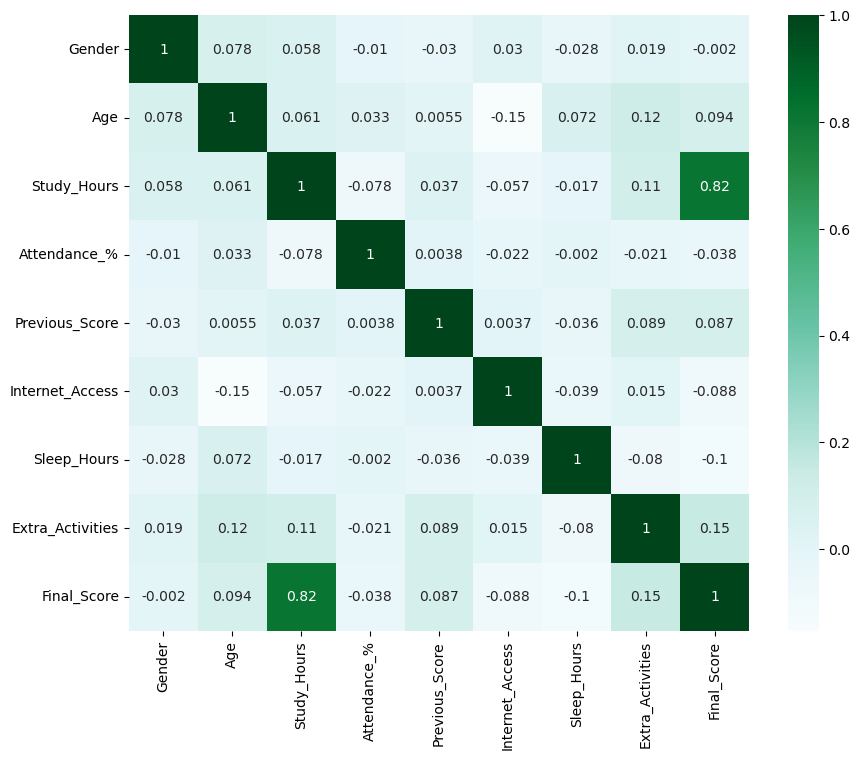

In [94]:
# heatmap : to visualize the correlation
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot = True , cmap = 'BuGn')
plt.savefig('student_corr.jpg')

<Axes: xlabel='Previous_Score', ylabel='Final_Score'>

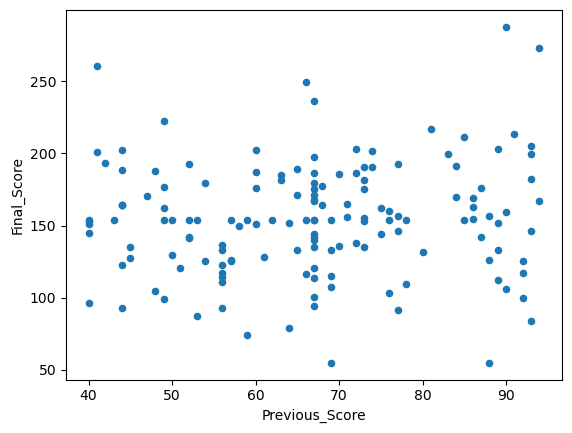

In [130]:
df.plot(x = 'Previous_Score',y='Final_Score', kind='scatter')

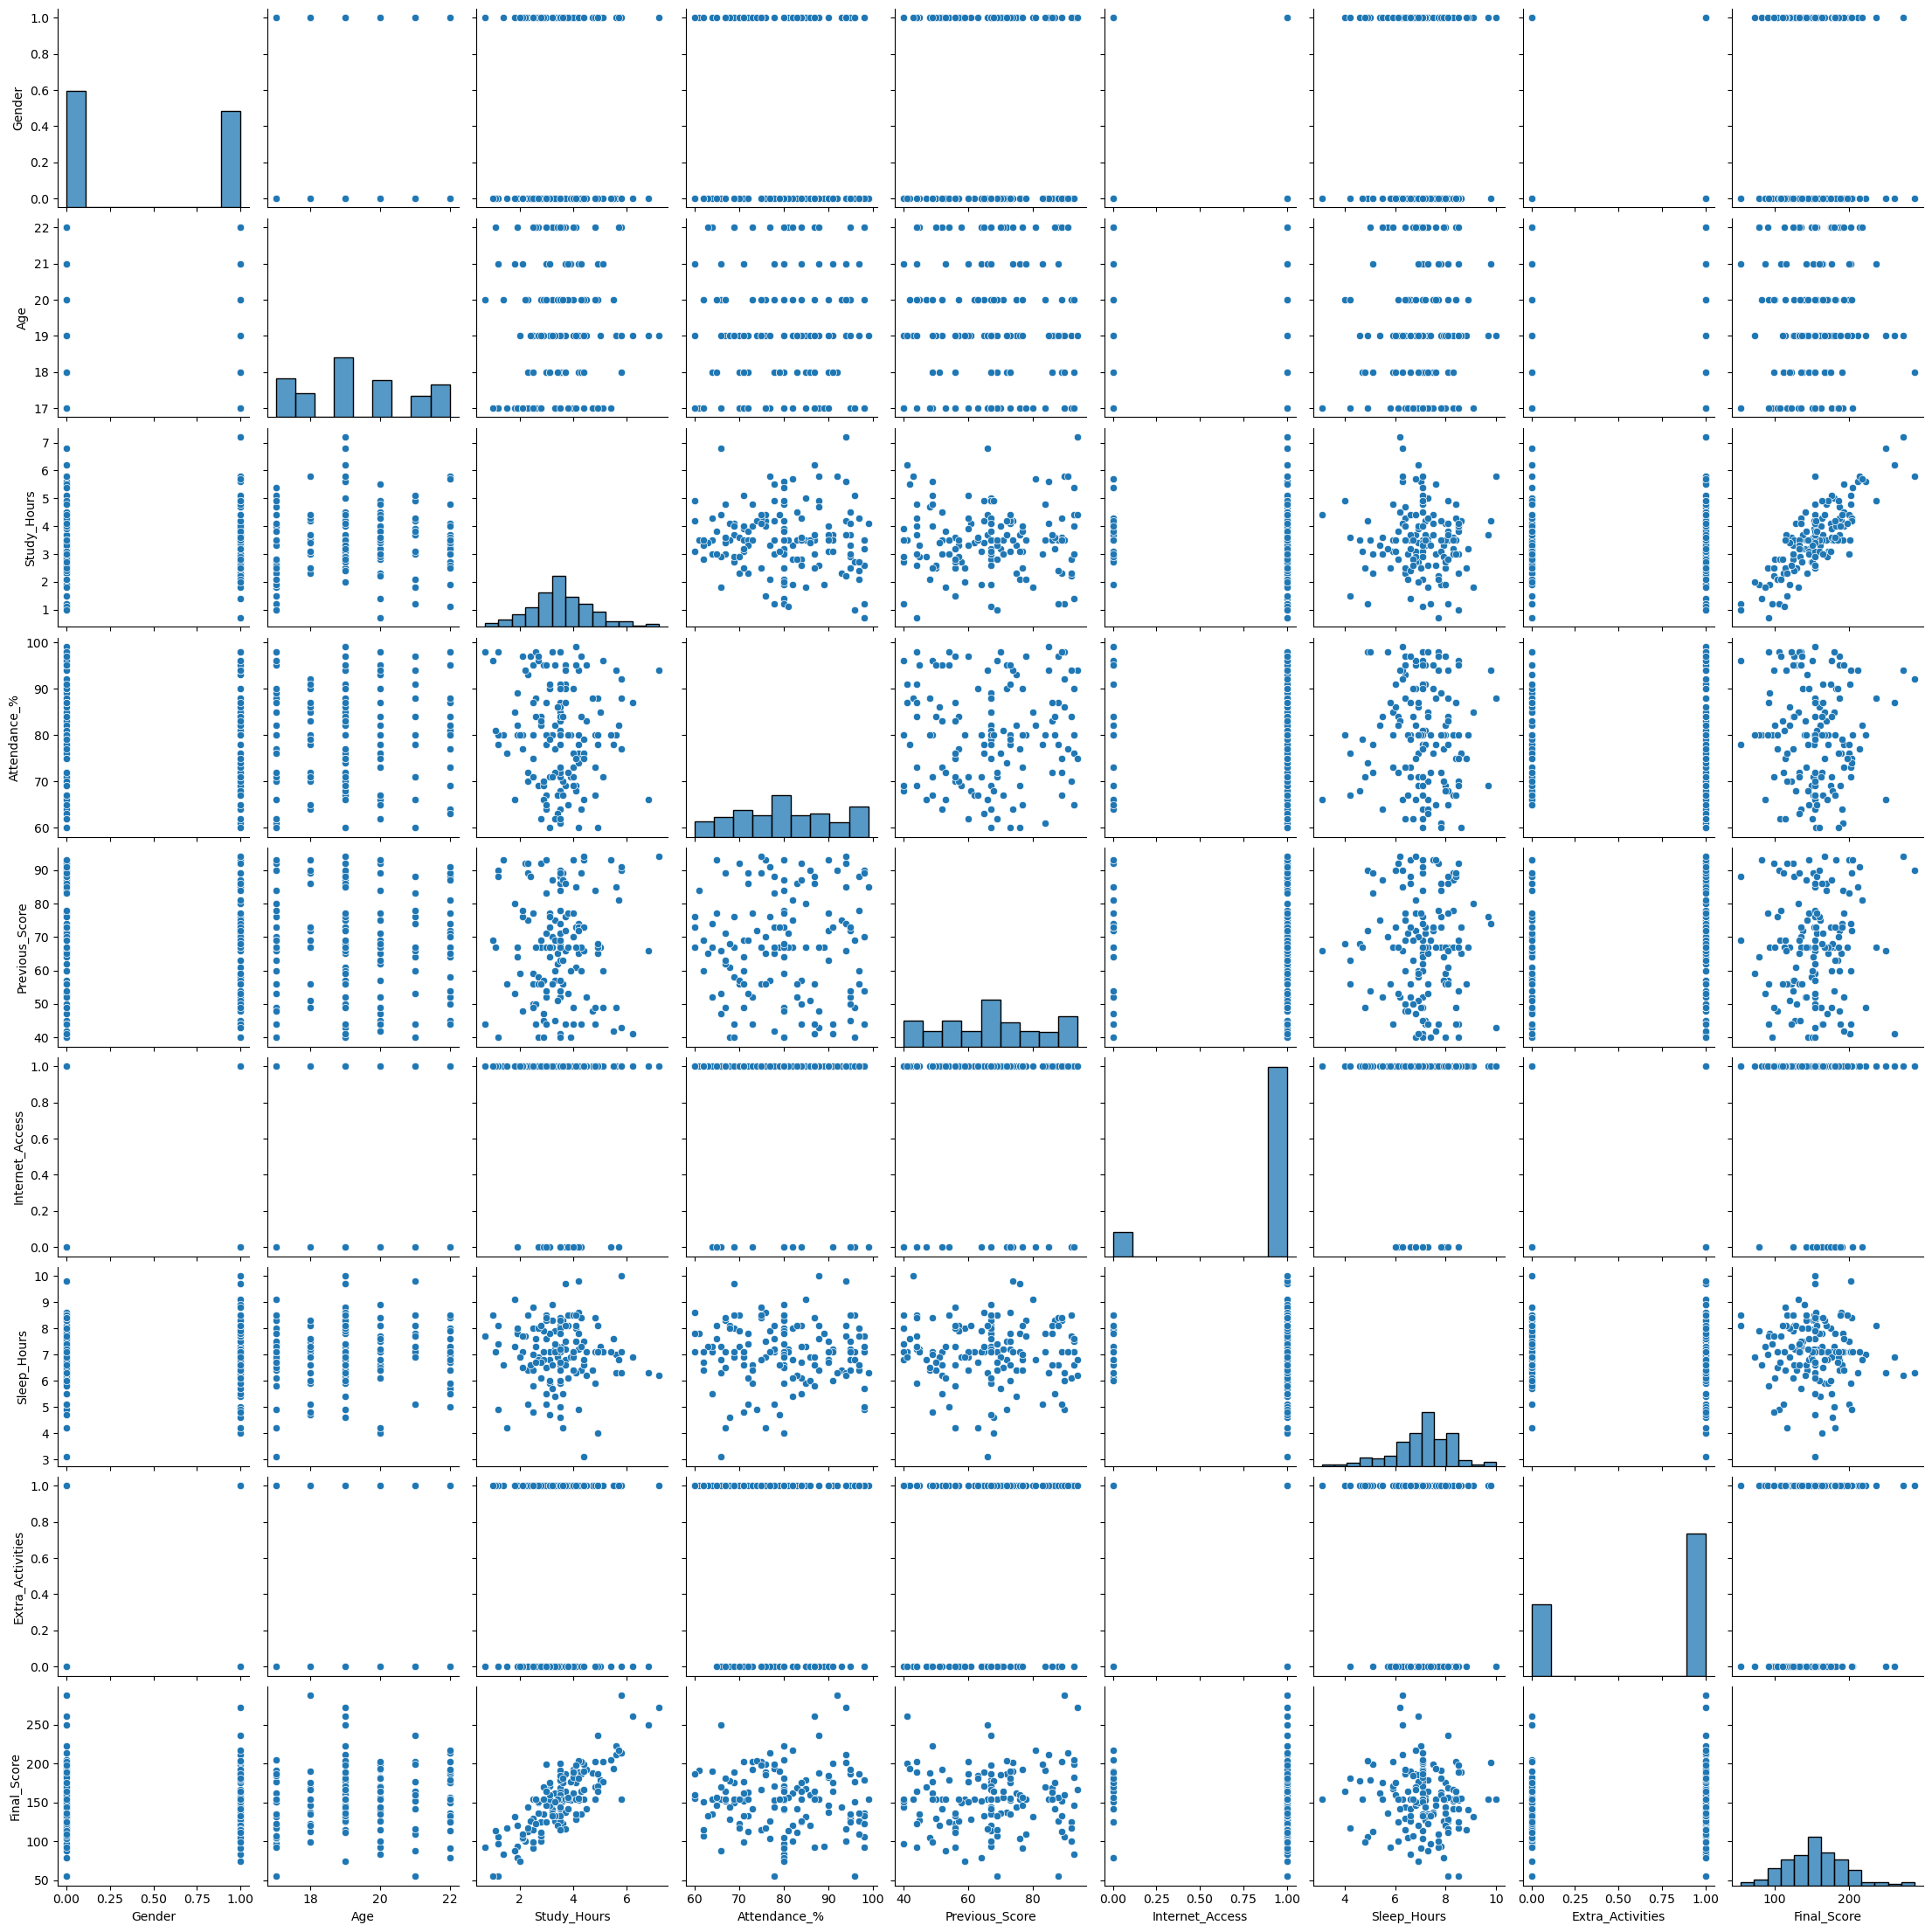

In [34]:
sns.pairplot(df)

In [131]:
x = df.drop(['Final_Score'],axis=1)
y = df.Final_Score

In [155]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state=1)

In [156]:
display(x_test,y_test)

,Gender,Age,Study_Hours,Attendance_%,Previous_Score,Internet_Access,Sleep_Hours,Extra_Activities,Parental_Education_Diploma,Parental_Education_High School,Parental_Education_Master,Parental_Education_PhD
14,0,19.0,2.8,84.0,92.0,0,6.1,1,False,False,False,False
98,0,20.0,5.5,78.0,42.0,1,7.6,1,False,False,False,False
75,0,17.0,1.5,76.0,56.0,1,4.2,0,False,False,True,False
16,0,20.0,4.5,95.0,52.0,1,7.1,1,False,False,False,True
131,1,22.0,4.0,73.0,77.0,1,6.4,1,False,False,True,False
56,0,21.0,3.9,71.0,60.0,1,6.9,1,False,False,False,True
141,1,20.0,4.9,80.0,68.0,1,4.0,1,False,False,False,True
44,0,21.0,5.1,71.0,60.0,1,7.1,1,False,False,False,True
29,0,19.0,3.5,91.0,41.0,1,7.1,1,False,True,False,False
120,0,18.0,3.1,91.0,73.0,0,6.0,0,True,False,False,False


14     125.147903
98     193.340127
75     117.073684
16     192.674477
131    192.366254
56     176.196962
141    164.084469
44     202.293104
29     200.881159
120    175.374180
94     133.131465
5      167.602514
102    204.806011
51     137.842067
78     104.324960
42      55.064584
92     170.171183
66     135.292563
31     153.971936
35     272.866152
90     113.444305
84     153.971936
77      87.561366
40     156.077489
125     54.939207
99     133.362985
33     169.867170
19     177.707516
73     222.605925
146    110.920993
Name: Final_Score, dtype: float64

In [157]:
linearmodel = LinearRegression()
linearmodel

LinearRegression()

In [158]:
# training the model
linearmodel.fit(x_train,y_train)

LinearRegression()

In [159]:
y_pred = linearmodel.predict(x_test)
y_pred

array([143.92048141, 211.1279306 ,  95.16106672, 181.01685889,
       176.63705882, 163.16393504, 191.85561133, 197.03915241,
       157.6841527 , 143.47764433, 149.76061316, 153.13234027,
       211.16050161, 157.9708584 , 104.15221597,  96.23482276,
       131.38942639, 176.69142021, 154.8902449 , 270.09826278,
        96.5923246 , 212.69654009, 110.36908276, 159.70098951,
        79.70046529, 165.7716051 , 194.28338084, 154.5783751 ,
       216.95542314, 127.67500965])

In [160]:
mse = mean_squared_error(y_test,y_pred)
print("mse is ",mse)
print("rmse is ", np.sqrt(mse))
print("mae is ",mean_absolute_error(y_test,y_pred))

mse is  620.3431408795466
rmse is  24.90668867753292
mae is  20.631047523459348


In [161]:
residual = y_test - y_pred
residual


14    -18.772578
98    -17.787804
75     21.912617
16     11.657618
131    15.729195
56     13.033027
141   -27.771142
44      5.253951
29     43.197006
120    31.896536
94    -16.629148
5      14.470174
102    -6.354491
51    -20.128791
78      0.172744
42    -41.170238
92     38.781756
66    -41.398858
31     -0.918309
35      2.767889
90     16.851980
84    -58.724605
77    -22.807717
40     -3.623500
125   -24.761258
99    -32.408620
33    -24.416211
19     23.129141
73      5.650502
146   -16.754017
Name: Final_Score, dtype: float64

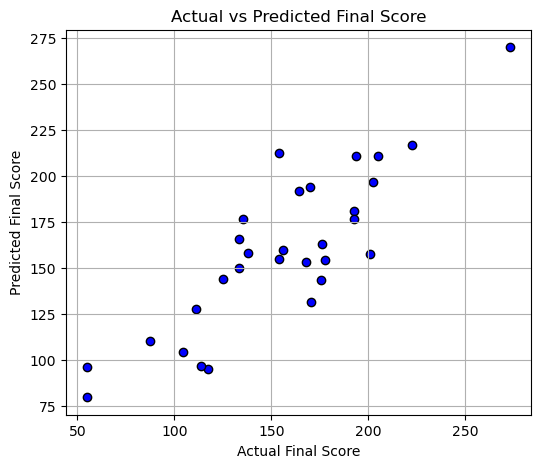

In [162]:
plt.figure(figsize = (6,5))
plt.scatter(y_test, y_pred, color='blue', edgecolor='k')
plt.xlabel("Actual Final Score")
plt.ylabel("Predicted Final Score")
plt.title("Actual vs Predicted Final Score")
plt.grid(True)
plt.show()

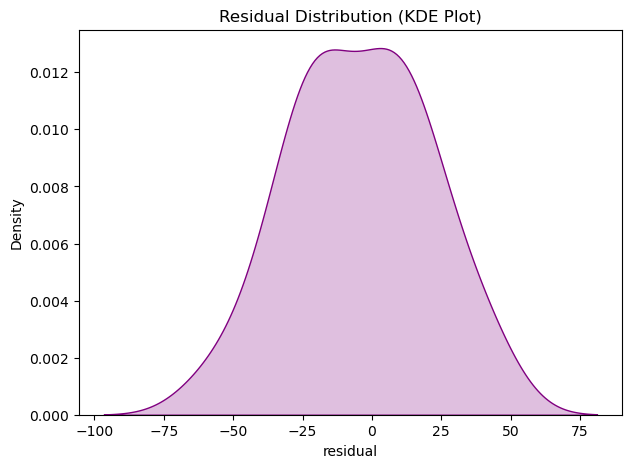

In [163]:
plt.figure(figsize=(7,5))
sns.kdeplot(residual, fill=True, color="purple")
plt.title("Residual Distribution (KDE Plot)")
plt.xlabel("residual")
plt.show()


In [164]:
r2score = r2_score(y_test,y_pred)
print("co-efficient of determination: ",r2score)

co-efficient of determination:  0.7196810233598512


<Axes: ylabel='Final_Score'>

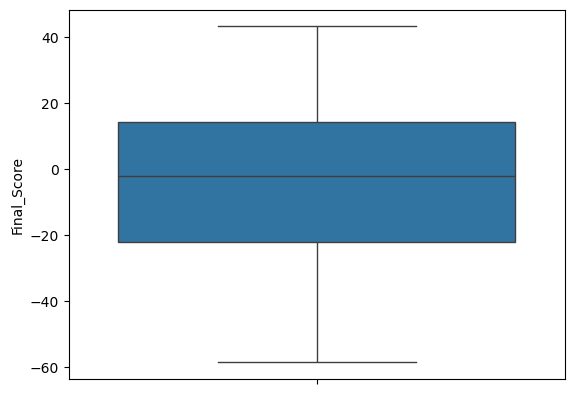

In [165]:
sns.boxplot(residual)